<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Ingeniería de Características ###
###  Sustitución de datos faltantes ###

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Carlos Augusto Arellano Muro <br>
Fecha entrega: 12 de febrero, 2022 <br>

* * *

<br>
<br>

En el archivo tratamiento_de_valores_faltantes.csv, se encuentran cuatro variables.

En un archivo con extensión ipynb, identifique cada una de estas variables (categórica o numérica, su distribución, o si presenta datos atípicos) y sustituya los valores faltantes con algún método que crea conveniente. Importante: justifique el método usado.

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
ruta = 'C:/Users/nuno/OneDrive - ITESO/Ciencia de Datos/ingenieria_de_caracteristicas/'
df = pd.read_csv(ruta+'tratamiento_de_valores_faltantes.csv')
df.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


In [38]:
df.dtypes

x1    float64
x2     object
x3    float64
x4    float64
dtype: object

La cantidad de valores faltantes por variable:

In [39]:
pd.isna(df).sum()

x1    18
x2    20
x3    14
x4    17
dtype: int64

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x3'}>],
       [<AxesSubplot:title={'center':'x4'}>, <AxesSubplot:>]],
      dtype=object)

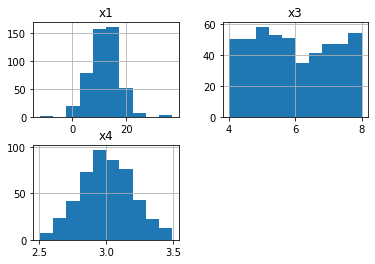

In [40]:
df.hist()

<AxesSubplot:>

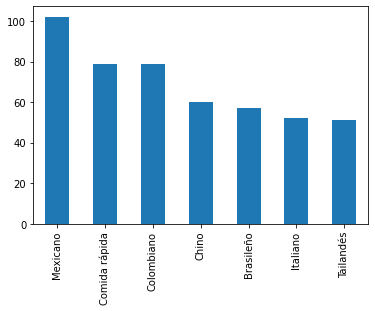

In [41]:
df['x2'].value_counts().plot(kind='bar')

In [42]:
print('Mediana:\n', df.drop(['x2'], axis=1).median(), '\n')

print('Media:\n', df.drop(['x2'], axis=1).mean())

Mediana:
 x1    11.997242
x3     5.887484
x4     3.000913
dtype: float64 

Media:
 x1    11.946714
x3     5.955536
x4     3.003786
dtype: float64


In [43]:
df.drop(['x2'], axis=1).kurt()

x1    3.157644
x3   -1.260308
x4   -0.290781
dtype: float64

In [44]:
q1 = df.drop(['x2'], axis=1).quantile(0.25)
q3 = df.drop(['x2'], axis=1).quantile(0.75)
iqr = q3-q1

((df.drop(['x2'], axis=1)<q1-3*iqr)|(df.drop(['x2'], axis=1)>q3+3*iqr)).sum()

x1    6
x3    0
x4    0
dtype: int64

Como podemos observar arriva, existen valores extremos para la variable **x1**. Para evitar que nos ocacione ruido y disturbio podemos sustituirlos como valores faltantes asumiendo que nuestro analisis no son importantes.

In [45]:
q1 = df['x1'].quantile(0.25)
q3 = df['x1'].quantile(0.75)
iqr = q3-q1

df[(df['x1']<q1-3*iqr)|(df['x1']>q3+3*iqr)] = np.NaN
((df['x1']<q1-3*iqr) | (df['x1']>q3+3*iqr)).sum()

0

La primera variable para sustituir es **x2**. Siendo una variable categórica entonces el método que usare es el de la moda, porque es una forma sencilla pero conveniente ya que no es numérica y no tiene que considerar las otras variables:

In [46]:
df['x2'] = df['x2'].fillna(df['x2'].mode()[0])

La variable **x3** parece tener una distribución uniforme y tiene curtosis de -1.26. Por lo tanto, las voy a sustituir con valores de forma aleatoria de la misma variable.

In [47]:
for c in ['x3']:
    for o in np.where(df[c].isna())[0]:
        dim = df[c].dropna().shape[0]
        i = np.random.randint(dim)
        val = df[c].dropna().iloc[i]
        df[c].iloc[o] = val

C:\Users\nuno\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


La variable **x1** es muy parecida a la normal en el histograma, pero tiene mucha curtosis y poco sesgo. Entonces, voy a imputar los valores faltantes usando la media (la mediana es casi la misma).

In [48]:
df['x1'] = df['x1'].fillna(df['x1'].mean())

La variable **x4** es muy parecida a la normal en el histograma y la curtosis y no parece tener mucho sesgo (sin hacer más pruebas de normalidad). Por lo tanto, voy a utilizar la mediana para sustituir los perdidos.

In [49]:
df['x4'] = df['x4'].fillna(df['x4'].median())

In [50]:
pd.isna(df).sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64